<a href="https://colab.research.google.com/github/escape1001/ormcamp/blob/main/python/ormcamp_240122_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 용어, 플로우 정리
- https://m.blog.naver.com/milkway01/221834553317
- https://deep-wide-studio.tistory.com/96
- https://mixpanel.mfitlab.com/blog/introduce-product-data-analysis-for-beginner
- https://bigsong.tistory.com/35

# pandas란?
- 파이썬으로 엑셀 다룬다고 생각하기~ 엑셀보다 더 많은 데이터 다룰 수 있음
- pandas는 numpy를 기반으로 만들어짐. 그래서 numpy가 더 빨러..
- 시리즈(엑셀 칼럼 같은 것), 데이터프레임(엑셀 테이블 같은 것)이라는 데이터 구조가 있음!

## 데이터프레임
- 행이 많은 경우 데이터 처리를 위해 고사양 장비가 필요하거나 샘플링이 필요할 수 있음
- 열이 많은 경우 변수가 많다는 의미! 어떤 데이터를 분석할지 선택과 집중 필요.

In [1]:
import pandas as pd

# 데이터프레임 생성
data = {'이름': ['홍길동', '임꺽정', '이순신'],
        '나이': [30, 35, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)
print(df)

    이름  나이  도시
0  홍길동  30  서울
1  임꺽정  35  부산
2  이순신  40  광주


## 시리즈
- 데이터프레임의 각 열은 시리즈.
- 시리즈는 벡터화 연산을 지원. 이를 통해 데이터에 대한 복잡한 계산을 간단하고 빠르게 수행할 수 있습니다. (numpy)
- ex) 모든 값에 동일한 연산 적용, 조건에 따라 데이터 필터링

In [3]:
# 시리즈 생성
series = pd.Series(['바나나', '사과', '망고'])
series

0    바나나
1     사과
2     망고
dtype: object

## 데이터 변환
- 엑셀 파일이나 csv를 데이터프레임으로 불러올 수 있음!

In [8]:
# 엑셀 파일을 DataFrame으로 불러오기
# df = pd.read_excel("example.xlsx")
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


## 데이터프레임 기본 조회 방법
- `head() 메소드` : 처음 5줄 보여줘서 구조나 깨짐여부 빠르게 파악 가능
- `tail() 메소드` : 맨 끝 5줄 보여줘서 구조나 깨짐여부 빠르게 파악 가능
- `info() 메소드` : 각 컬럼 null값 여부와 데이터 타입 확인 가능. 있으면 머신러닝 모델 대부분을 돌리지 못하기 때문에 중요!
- `describe() 메소드` : 데이터프레임의 통계적 요약정보 출력. 일단 min/max 로 이상한 값 확인 가능 + mean으로 평균이 이상하지 않은지 + 25% 50% 75%로 데이터 편중, 표준편차 확인 가능
- `dropna()` 메소드 : 결측치 제거 가능. inplace=True로 변수명 재할당 가능(덮어쓰기)

In [16]:
# 데이터 파악 시 요구정의서, 컬럼에 대한 히스토리 파악하면 좋음. (스터디 단계에서는 캐글)
df.head()
df.tail()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      1 non-null      object 
 1   나이      1 non-null      float64
 2   도시      1 non-null      object 
dtypes: float64(1), object(2)
memory usage: 32.0+ bytes


,나이
count,1.0
mean,30.0
std,NaN
min,30.0
25%,30.0
50%,30.0
75%,30.0
max,30.0


### dropna() 결측치 처리

In [15]:
import pandas as pd
import numpy as np

# 샘플 데이터프레임 생성
data = {'이름': ['홍길동', '임꺽정', None],
        '나이': [30, None, 40],
        '도시': ['서울', '부산', '광주']}
df = pd.DataFrame(data)

# 결측치가 포함된 데이터프레임 출력
print("원본 데이터프레임:\n", df)

# 결측치 제거
df.dropna(inplace=True)

# 결측치가 제거된 데이터프레임 출력
print("\n결측치 제거 후 데이터프레임:\n", df)

원본 데이터프레임:
      이름    나이  도시
0   홍길동  30.0  서울
1   임꺽정   NaN  부산
2  None  40.0  광주

결측치 제거 후 데이터프레임:
     이름    나이  도시
0  홍길동  30.0  서울


## dataframe의 속성
- shape : (행,열) 튜플로 반환
- dtypes : 데이터 타입 반환
- index : index의 범위를 반환함. 이걸로 for문 돌릴수있어~
- Columns : 열 이름들 반환

In [19]:
# Pandas DataFrame 예시
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
})

# 각 속성 호출
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Index:", df.index)
print("Columns:", df.columns)
print(type(df.index))

Shape: (3, 3)
Data Types:
 Name    object
Age      int64
City    object
dtype: object
Index: RangeIndex(start=0, stop=3, step=1)
Columns: Index(['Name', 'Age', 'City'], dtype='object')
<class 'pandas.core.indexes.range.RangeIndex'>


## pandas 기본 데이터타입
- 숫자형 : int64, float64
- 문자형 : object(문자열 or 복합형)
- 불리언 : bool
- 날짜 : datetime64

## 자료형 변경
- .astype()
- pd.to_datetime(열) : 날짜로 변경

In [21]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob'],  # 문자열 타입
    'Age': ['25', '30'],       # 숫자 데이터를 문자열로 표현
    'Member': ['True', 'False'],  # 불린 데이터를 문자열로 표현
    'Join Date': ['2021-01-01', '2021-07-01']  # 날짜 데이터를 문자열로 표현
}

df = pd.DataFrame(data)

# 데이터 타입 변환
df['Age'] = df['Age'].astype(int)  # 'Age' 열을 정수형으로 변환
df['Member'] = df['Member'].astype(bool)  # 'Member' 열을 불린형으로 변환
df['Join Date'] = pd.to_datetime(df['Join Date'])  # 'Join Date' 열을 datetime으로 변환

# 결과 출력
print(df)
print("------------")
print(df.dtypes)

    Name  Age  Member  Join Date
0  Alice   25    True 2021-01-01
1    Bob   30    True 2021-07-01
------------
Name                 object
Age                   int64
Member                 bool
Join Date    datetime64[ns]
dtype: object


## dataframe 특정 열 선택
- 딕셔너리 키 값 가져오듯이 dataframe["key"]로 가져오기 / 이렇게 선택된 객체는 '시리즈'
- dataframe[["key1", "key2"]] 형식으로 다중 열 선택도 가능~ / 이렇게 가져온 객체는 '새로운 데이터프레임'
- index
- loc, iloc

In [28]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'Berlin']
}
df = pd.DataFrame(data)

# 단일 열 선택 -> 결과는 Series
age_series = df['Age']
print(type(age_series))

# 다중 열 선택 -> 결과는 DataFrame
print("======[다중 열 선택]======")
subset_df = df[['Name', 'City']]
print(type(subset_df))

# loc 사용 예시
# location 약자. 사람 기준으로 읽는 키값에 접근
print("======[loc 사용 예시]======")
print(df.loc[:, 'Age'])

# iloc 사용 예시
# 컴퓨터 기준으로 읽틑 키값. 1번 인덱스인 age로 접근
print("======[iloc 사용 예시]======")
print(df.iloc[:, 1])

# 결측치 추가
df.loc[1, 'Age'] = np.nan

# 결측치 확인
# null이 아닌 값은 false, null인 값은 true로 표시
print("======[결측치 확인]======")
print(df['Age'].isnull())

<class 'pandas.core.series.Series'>
======[다중 열 선택]======
<class 'pandas.core.frame.DataFrame'>
======[loc 사용 예시]======
0    25
1    30
2    35
Name: Age, dtype: int64
======[iloc 사용 예시]======
0    25
1    30
2    35
Name: Age, dtype: int64
======[결측치 확인]======
0    False
1     True
2    False
Name: Age, dtype: bool


## series 메서드
- sum : 해당 시리즈의 합계 반환
- mean : 해당 시리즈의 평균 반환
- min : 최소값
- max : 최대값
- std : 표준편차 (분산에 루트 씌운 것)
- var : 분산
- value_counts : 각 값이 몇번씩 나왔는지 빈도 반환
- nunique : 고유한 값의 갯수

In [29]:
import pandas as pd

# Series 생성
data = pd.Series([10, 20, 20, 30, 40])

# sum(), mean(), value_counts() 사용 예시
print("Sum:", data.sum())           # 합계
print("Mean:", data.mean())         # 평균
print("Value Counts:\n", data.value_counts())  # 빈도 계산

Sum: 120
Mean: 24.0
Value Counts:
 20    2
10    1
30    1
40    1
dtype: int64


In [32]:
import pandas as pd

# Series 생성
data = pd.Series([10, 15, 20, 25, 30, 20])

# 다양한 메서드 활용
print("Minimum:", data.min())          # 최소값
print("Maximum:", data.max())          # 최대값
print("Standard Deviation:", data.std())  # 표준편차 : 분산에 루트씌운거래
print("Variance:", data.var())          # 분산
print("Number of Unique Values:", data.nunique())  # 고유값 개수

# 데이터프레임 요약
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 55000, 60000, 65000, 70000]
})
print("\nDataFrame Summary:\n", df.describe())
print("\nDataFrame Info:")
df.info()

Minimum: 10
Maximum: 30
Standard Deviation: 7.0710678118654755
Variance: 50.0
Number of Unique Values: 5

DataFrame Summary:
              Age       Salary
count   5.000000      5.00000
mean   35.000000  60000.00000
std     7.905694   7905.69415
min    25.000000  50000.00000
25%    30.000000  55000.00000
50%    35.000000  60000.00000
75%    40.000000  65000.00000
max    45.000000  70000.00000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     5 non-null      int64
 1   Salary  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


## Series 연산자
- + - * / 같은 연산자 사용 가능
- < > == 같은 조건연산도 가능

In [47]:
test = pd.read_csv("/content/sample_data/california_housing_train.csv")

test_series = test.head()["housing_median_age"]
test_series2 = test_series * 2 # 시리즈의 각 값에 곱하기 2 해주기

print(test_series)
print(test_series2)

over17 = test_series > 17 # 17세 넘는 경우에만 True 반환.
print(over17)

# 위 조건연산 이용해서 필터링 가능!
filtered_series = test_series[over17]
print(filtered_series)

0    15.0
1    19.0
2    17.0
3    14.0
4    20.0
Name: housing_median_age, dtype: float64
0    30.0
1    38.0
2    34.0
3    28.0
4    40.0
Name: housing_median_age, dtype: float64
0    False
1     True
2    False
3    False
4     True
Name: housing_median_age, dtype: bool
1    19.0
4    20.0
Name: housing_median_age, dtype: float64


# dataframe 열 제어

In [49]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# 열 이름 변경
df = df.rename(columns={'A': 'aa', 'B': 'bb', 'C': 'cc'})
print(df)

# 모든 열 이름 변경
df.columns = ['X', 'Y', 'Z']
print(df)

   aa  bb  cc
0   1   4   7
1   2   5   8
2   3   6   9
   X  Y  Z
0  1  4  7
1  2  5  8
2  3  6  9


In [50]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

# 'Salary'라는 새 열 추가
# 잘 사용 안함~ join으로 결합을 하면 했지
df['Salary'] = [50000, 60000, 70000]
print(df)

# 'Age' 열 삭제
# ram 효율 증대를 위해 사용하는 경우 많음
df = df.drop('Age', axis=1)
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
      Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   70000


In [55]:
#Sample DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# 가로로 연결 (열 방향)
# axis=1 하면 옆으로 붙고 0으로 하면 밑으로 붙음
# 열 이름이 같고 말고는 상관없어~
result = pd.concat([df1, df2], axis=1)

print(result)

   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [57]:
# Sample DataFrames with different column names
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'X': [5, 6], 'Y': [7, 8]})

# 가로로 연결 (열 방향) - 열 이름 다름
# ignore_index 로 열 이름 리셋
result = pd.concat([df1, df2], axis=1, ignore_index=True)

print(result)

   0  1  2  3
0  1  3  5  7
1  2  4  6  8


In [58]:
# Sample DataFrames with different index
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=[0, 1])
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=[2, 3])

# 세로로 연결 (행 방향) - 인덱스 다름
# 보통 누적된 데이터에 신규 데이터 합칠 때 사용~
result = pd.concat([df1, df2], ignore_index=True)

print(result)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


# 데이터 파이프라인
- 데이터 파이프라인은 원시 데이터(raw data)를 수집하여 가치 있는 정보로 변환하는 일련의 과정을 말합니다.
- 이 과정은 크게 데이터 수집, 처리, 저장, 분석 단계로 나뉩니다. 데이터 파이프라인을 통해 우리는 기업의 다양한 데이터를 체계적으로 관리하고, 비즈니스 의사결정에 필요한 통찰력을 얻을 수 있습니다.

## 데이터 파이프라인의 구성 요소

1. **데이터 수집**: 다양한 출처에서 데이터를 수집합니다. 예를 들어, 센서 데이터, 온라인 판매 기록, 고객 설문 조사 등.
2. **데이터 처리 및 정제**: 수집된 데이터는 종종 불완전하거나 불필요한 정보를 포함하고 있을 수 있습니다. 이 단계에서는 데이터를 정제하고, 필요한 형태로 변환합니다.
3. **데이터 저장**: 처리된 데이터는 데이터베이스나 데이터 웨어하우스에 저장됩니다. 이렇게 저장된 데이터는 필요할 때 쉽게 접근할 수 있어야 합니다.
4. **데이터 분석 및 시각화**: 저장된 데이터를 분석하여 비즈니스에 유용한 인사이트를 얻습니다. 데이터 시각화는 복잡한 데이터를 이해하기 쉬운 형태로 보여주어 의사결정 과정을 지원합니다.

## **데이터 파이프라인의 실제 적용 예**

**1. 생산 최적화**
- **목적**: 생산 과정의 효율성과 품질을 개선하고, 자원 낭비를 최소화합니다.
- **데이터 활용 방법**:
    - 센서 및 기계 데이터를 활용해 생산 공정의 효율성 분석
    - 공정 중 발생하는 이상 상태나 지연을 실시간으로 탐지
    - 원자재 소비, 에너지 사용량, 기계 가동률 등을 분석하여 최적의 생산 계획 수립
- **결과**: 낭비되는 자원을 줄이고, 생산 공정의 속도와 품질을 향상시킬 수 있습니다.

**2. 재고 관리**
- **목적**: 효율적인 재고 관리를 통해 과잉 재고나 재고 부족 문제를 해결합니다.
- **데이터 활용 방법**:
    - 판매 데이터, 재고 수준, 공급망 정보를 분석
    - 판매 추이와 시즌별, 지역별 수요 예측
    - 최적의 재고 수준을 유지하기 위한 자동 주문 시스템 개발
- **결과**: 재고 부족으로 인한 판매 기회 손실을 줄이고, 과잉 재고로 인한 비용을 절감할 수 있습니다.

**3. 고객 행동 분석**
- **목적**: 고객의 구매 패턴과 선호도를 이해하여 마케팅 전략을 개선합니다.
- **데이터 활용 방법**:
    - 고객 구매 이력, 온라인 행동 데이터, 시장 조사 결과 분석
    - 고객 세분화를 통해 타겟 마케팅 전략 수립
    - 구매 추천 시스템, 맞춤형 프로모션, 개인화된 커뮤니케이션 전략 개발
- **결과**: 고객 만족도를 높이고, 매출 증대에 기여할 수 있습니다.

# EDA 실습

In [92]:
dataset = pd.read_csv("/content/The-Big-List-20231127-Reviews-to-4650.csv", encoding='latin1')

dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [93]:
# 고유값 확인 -> 중복되지 않는 값!
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [94]:
#결측치 제거
# True = 1 False = 0
print(dataset.isnull().sum()) # null의 갯수가 sum

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64


In [100]:
# 'Age' 열 삭제
# dataset = dataset.drop('T', axis=1)
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4648 non-null   int64 
 1   Brand     4648 non-null   object
 2   Variety   4648 non-null   object
 3   Style     4648 non-null   object
 4   Country   4648 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 254.2+ KB


In [101]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

<ipython-input-101-25ddd8b41279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')


In [102]:
# 중복 데이터 확인 - duplicated()
duplicates_count = df.duplicated().sum()
print(duplicates_count)

0


In [103]:
# 전체 데이터에 대한 중복 제거
df = df.drop_duplicates()

In [107]:
# 특정 컬럼에 대한 중복 제거
# 예: 'Brand' 컬럼 기준 중복 제거
df = df.drop_duplicates(subset=['Brand'])

0       5.0
1       5.0
2       4.5
3       4.5
4       5.0
       ... 
4645    3.5
4646    1.0
4647    2.0
4648    2.0
4649    0.5
Name: Stars, Length: 4648, dtype: float64

In [108]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q3 = dataset['Stars'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Stars'] < (Q1 - 1.5 * IQR)) | (dataset['Stars'] > (Q3 + 1.5 * IQR)))]

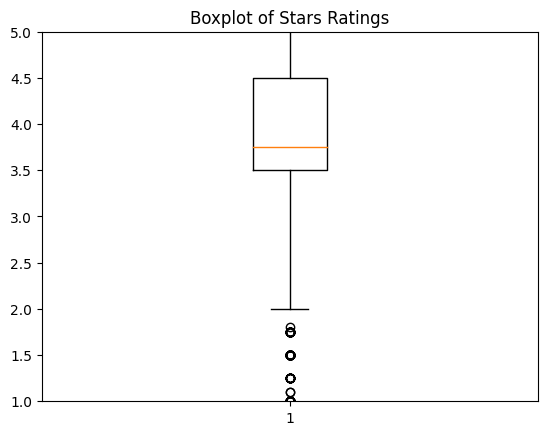

In [111]:
#박스플롯을 사용한 이상치 탐지
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')  # 인코딩이 필요한 경우 변경

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()